In [1]:
# This notebook processes the Vcontact2 data, and looks at some numbers / statistics.

### Input files needed:
# - genome_by_genome_overview.csv: generated by vcontact2.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
sns.set(font='arial')
sns.set_style("white")
sns.set_style("ticks")
%matplotlib inline

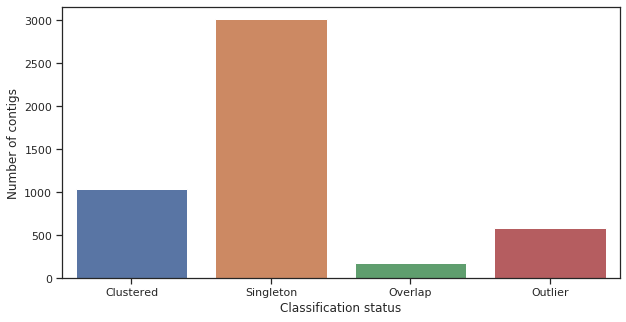

In [2]:
#plot basic vcontact stats.
#4842 contigs in input --> 4807 in output.
genomeoverview = pd.read_csv('data/genome_by_genome_overview.csv', sep=',', index_col=0)
genomeoverview['VCstatsred'] = genomeoverview['VC Status']
genomeoverview['VCstatsred'] = genomeoverview['VCstatsred'].str.replace('Overlap.*', 'Overlap', regex=True)
#Nodes:
nodesoverview = genomeoverview[genomeoverview['Genome'].str.contains("NODE")]
plt.figure(figsize=(10,5))
g = sns.countplot(nodesoverview['VCstatsred'])
g.set(xlabel='Classification status',ylabel="Number of contigs")
g.figure.savefig('figures/VCstats.png',dpi=300)

In [3]:
keepVCs = list(nodesoverview[nodesoverview['VC Status'] == 'Clustered']['VC'].unique())
#genomeoverview[genomeoverview['VC'].isin(keepVCs)]
vcdic = {}
for i in keepVCs:
    if sum('NODE' in s for s in list(genomeoverview[genomeoverview['VC'] == i]['Genome'])) < len(list(genomeoverview[genomeoverview['VC'] == i]['Genome'])):
        vcdic[i] = genomeoverview[genomeoverview['VC'] == i]

In [4]:
print('Clustered NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Clustered"])))
print('Singleton NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Singleton"])))
print('Overlap NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Overlap"])))
print('Outlier NODES: ' + str(len(nodesoverview[nodesoverview['VCstatsred'] == "Outlier"])))
keepVCs = list(nodesoverview[nodesoverview['VC Status'] == 'Clustered']['VC'].unique())
print('Total number of clusters with NODES in: ' + str(len(keepVCs)))
pureNODEVC = 0
nameddfdic = {}
for i in keepVCs:
    tempdf = genomeoverview[genomeoverview['VC'] == i]
    lenclus = len(tempdf)
    counter = 0
    for j in list(tempdf['Genome']):
        if 'NODE' in j:
            counter += 1
    if counter == lenclus:
        pureNODEVC += 1
    if counter != lenclus:
        nameddfdic[i] = tempdf
print('Total clusters with only nodes: ' + str(pureNODEVC))
for i in nameddfdic:
    #print(list(nameddfdic[i][~nameddfdic[i]['Genome'].str.contains('NODE')]['Family']))
    print(i)
    print(nameddfdic[i]['Genome'])
    print(nameddfdic[i]['Family'])
    print(len(nameddfdic[i]))

Clustered NODES: 1034
Singleton NODES: 3010
Overlap NODES: 181
Outlier NODES: 582
Total number of clusters with NODES in: 403
Total clusters with only nodes: 368
123_0
61                     Azospirillum~phage~Cd
65    BP10_NODE_123_length_2866_cov_1_435701
Name: Genome, dtype: object
61    Siphoviridae
65      Unassigned
Name: Family, dtype: object
2
49_1
32                          Acinetobacter~phage~phiAC-1
47                           Aeromonas~phage~vB_AsaM-56
110              BP18_NODE_1_length_32522_cov_11_534304
882      BeeP-17-2013_NODE_8_length_19907_cov_39_552295
931      BeeP-25-2013_NODE_4_length_19295_cov_37_789104
955     BeeP-35-2013_NODE_10_length_26028_cov_14_780163
982      BeeP-35-2013_NODE_2_length_43720_cov_19_440918
1047     BeeP-37-2013_NODE_2_length_40678_cov_31_109505
1107     BeeP-45-2013_NODE_2_length_27560_cov_75_850817
1118     BeeP-47-2013_NODE_2_length_14142_cov_93_536438
1144     BeeP-49-2013_NODE_20_length_8038_cov_16_068333
1324                     

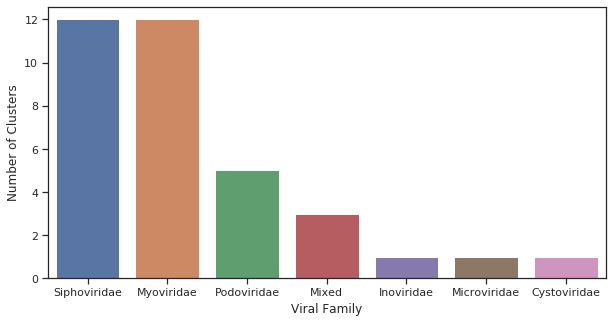

In [5]:
famnames = ["Siphoviridae","Myoviridae","Myoviridae","Podoviridae","Podoviridae","Myoviridae","Mixed","Siphoviridae","Siphoviridae","Myoviridae","Podoviridae","Siphoviridae","Siphoviridae","Myoviridae","Siphoviridae","Siphoviridae","Podoviridae","Inoviridae","Myoviridae","Myoviridae","Siphoviridae","Podoviridae","Myoviridae","Myoviridae","Myoviridae","Siphoviridae","Mixed","Siphoviridae","Myoviridae","Mixed","Siphoviridae","Siphoviridae","Microviridae","Myoviridae","Cystoviridae"]
plt.figure(figsize=(10,5))
g = sns.countplot(famnames)
g.set(xlabel="Viral Family",ylabel="Number of Clusters")
g.figure.savefig('figures/Cluster_names.png',dpi=300)

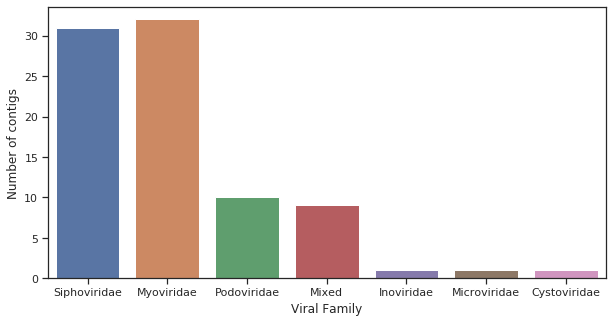

In [8]:
vcnamdic = {"123_0":"Siphoviridae","49_1":"Myoviridae","75_0":"Myoviridae","207_0":"Podoviridae","252_0":"Podoviridae","213_0":"Myoviridae","188_0":"Mixed","19_0":"Siphoviridae","103_0":"Siphoviridae","119_0":"Myoviridae","6_2":"Podoviridae","20_0":"Siphoviridae","54_0":"Siphoviridae","495_0":"Myoviridae","73_0":"Siphoviridae","292_0":"Siphoviridae","39_0":"Podoviridae","531_0":"Inoviridae","95_0":"Myoviridae","544_0":"Myoviridae","112_1":"Siphoviridae","57_0":"Podoviridae","558_0":"Myoviridae","59_12":"Myoviridae","386_0":"Myoviridae","293_0":"Siphoviridae","503_0":"Mixed","496_0":"Siphoviridae","461_0":"Myoviridae","54_1":"Mixed","71_0":"Siphoviridae","471_0":"Siphoviridae","284_0":"Microviridae","454_0":"Myoviridae","665_0":"Cystoviridae"}
vccountnamdic = {}
for i in nameddfdic:
    famnam = vcnamdic[i]
    if famnam not in vccountnamdic:
        vccountnamdic[famnam] = sum(nameddfdic[i]['Genome'].str.contains('NODE'))
    else:
        vccountnamdic[famnam] += sum(nameddfdic[i]['Genome'].str.contains('NODE'))
plt.figure(figsize=(10,5))
g = sns.barplot(x = list(vccountnamdic.keys()), y=list(vccountnamdic.values()))
g.set(xlabel="Viral Family",ylabel="Number of contigs")
g.figure.savefig('figures/Contig_names.png',dpi=300)

In [9]:
list(vccountnamdic.values())

[31, 32, 10, 9, 1, 1, 1]

In [31]:
### List of contigs containing antismash clusters:
antismash = ['BeeP-11-2013_NODE_10_length_45562_cov_39_780829', 'BeeP-11-2013_NODE_169_length_5958_cov_160_716545', 'BeeP-11-2013_NODE_890_length_1940_cov_18_632850', 'BeeP-38-2013_NODE_1_length_47472_cov_756_510180']
### Clusterstatus:

#genomeoverview[genomeoverview['Genome'].isin(antismash)]

### Family?

#for i in nameddfdic:
#    for j in list(nameddfdic[i]['Genome']):
#        if j in antismash:
#            print(nameddfdic[i])
#### so BeeP-38-2013_NODE_1_length_47472_cov_756_510180 is in a mixed cluster (myo & sipho)
#### And BeeP-11-2013_NODE_10_length_45562_cov_39_780829 is in a Siphoviridae cluster

### Other clusters?

#### For BeeP-11-2013_NODE_10_length_45562_cov_39_780829:
#genomeoverview[genomeoverview['VC'] == '54_0']
#### For BeeP-11-2013_NODE_169_length_5958_cov_160_716545:
#genomeoverview[genomeoverview['VC'] == '396_0']

,Genome,Order,Family,Genus,VC,VC Status,Size,VC Subcluster,VC Subcluster Size,Quality,Adj P-value,Topology Confidence Score,Genera in VC,Families in VC,Orders in VC,Genus Confidence Score,VCstatsred
467,BeeP-11-2013_NODE_10_length_45562_cov_39_780829,Unassigned,Unassigned,Unassigned,54_0,Clustered,5.0,VC_54_0,5.0,0.2629,1.0,0.2629,2.0,2.0,2.0,1.0,Clustered
